In [28]:
import tensorflow.compat.v1 as tf
import pandas as pd
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import to_categorical

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

playlog = pd.read_csv("../csv/LG_타자_김현수_playlog.csv")
situation = pd.read_csv("../csv/LG_타자_김현수_상황별.csv")

del playlog['Unnamed: 0']
del situation['Unnamed: 0']

display(playlog[:5])

,날짜,상대,이닝,투수,타자,P,결과,이전상황,이후상황,LEV,REa,WPs,WPe,WPa
0,2020-08-04,KIA,5초,이민우,4 김현수,1-2,우익수 홈런,2사 만루 2:3,2사 6:3,4.16,3.302,60.5,18.1,0.425
1,2020-08-18,KIA,10말,정해영,4 김현수,2-2,우익수 홈런,1사 5:5,1사 5:6,1.80,1.000,58.0,100.0,0.420
2,2020-07-04,삼성,12초,김대우,3 김현수,1-2,좌익수 홈런,1사 5:5,1사 6:5,1.80,1.000,55.9,17.9,0.380
3,2020-09-04,NC,8말,원종현,4 김현수,1-2,좌익수 안타,2사 만루 5:3,"2사 1,3루 5:5",6.05,1.723,22.7,60.7,0.380
4,2020-09-19,두산,8초,이승진,4 김현수,0-0,중견수 안타,2사 만루 6:6,"2사 1,3루 8:6",5.64,1.723,46.6,13.4,0.332


In [29]:
situation.rename(columns={"상대":"투수"}, inplace=True)

In [30]:
display(situation[:5])

,투수,타석,타수,득점,안타,2타,3타,홈런,루타,타점,도루,도실,볼넷,사구,고4,삼진,병살,희타,희비,타율,출루,장타,OPS,avLI,RE24,WPA
0,정해영,1,1,2,1,0,0,1,4,1,0,0,0,0,0,0,0,0,0,1.000,1.000,4.000,5.000,1.50,1.15,0.440
1,이민우,10,9,3,2,0,0,2,8,5,0,0,1,0,0,0,0,0,0,0.222,0.300,0.889,1.189,1.14,2.01,0.385
2,김대우,1,1,1,1,0,0,1,4,1,0,0,0,0,0,0,0,0,0,1.000,1.000,4.000,5.000,1.80,1.00,0.380
3,원종현,2,2,0,1,0,0,0,1,2,0,0,0,0,0,0,0,0,0,0.500,0.500,0.500,1.000,3.69,1.61,0.346
4,서폴드,8,8,3,4,1,0,1,8,4,0,0,0,0,0,0,0,0,0,0.500,0.500,1.000,1.500,0.74,2.96,0.344


In [31]:
summary = pd.merge(playlog, situation, how="inner", on="투수")
display(summary[:5])

,날짜,상대,이닝,투수,타자,P,결과,이전상황,이후상황,LEV,REa,WPs,WPe,WPa,타석,타수,득점,안타,2타,3타,홈런,루타,타점,도루,도실,볼넷,사구,고4,삼진,병살,희타,희비,타율,출루,장타,OPS,avLI,RE24,WPA
0,2020-08-04,KIA,5초,이민우,4 김현수,1-2,우익수 홈런,2사 만루 2:3,2사 6:3,4.16,3.302,60.5,18.1,0.425,10,9,3,2,0,0,2,8,5,0,0,1,0,0,0,0,0,0,0.222,0.300,0.889,1.189,1.14,2.01,0.385
1,2020-08-04,KIA,2초,이민우,4 김현수,2-1,우익수 홈런,무사 0:1,무사 1:1,0.97,1.000,60.5,50.0,0.105,10,9,3,2,0,0,2,8,5,0,0,1,0,0,0,0,0,0,0.222,0.300,0.889,1.189,1.14,2.01,0.385
2,2020-08-19,KIA,3말,이민우,4 김현수,2-3,볼넷,2사 1:1,2사 1루 1:1,0.47,0.134,51.2,52.6,0.014,10,9,3,2,0,0,2,8,5,0,0,1,0,0,0,0,0,0,0.222,0.300,0.889,1.189,1.14,2.01,0.385
3,2020-08-04,KIA,3초,이민우,4 김현수,2-1,좌익수 뜬공,2사 2:1,이닝종료 2:1,0.41,-0.117,42.3,43.4,-0.011,10,9,3,2,0,0,2,8,5,0,0,1,0,0,0,0,0,0,0.222,0.300,0.889,1.189,1.14,2.01,0.385
4,2020-05-30,KIA,3초,이민우,2 김현수,2-2,좌익수 뜬공,2사 0:0,이닝종료 0:0,0.46,-0.117,54.3,55.5,-0.012,10,9,3,2,0,0,2,8,5,0,0,1,0,0,0,0,0,0,0.222,0.300,0.889,1.189,1.14,2.01,0.385


In [32]:
train_csv = pd.concat([summary['상대'], summary['OPS'], summary['결과']], axis=1)
display(train_csv[:5])

,상대,OPS,결과
0,KIA,1.189,우익수 홈런
1,KIA,1.189,우익수 홈런
2,KIA,1.189,볼넷
3,KIA,1.189,좌익수 뜬공
4,KIA,1.189,좌익수 뜬공


In [33]:
#결과를 분류하는 과정
result_series = train_csv['결과']
for i in range(len(result_series)):
    result_series[i] = result_series[i].split()[-1]
    to_remove = ["실책", "*폭투", "*도루실패"]
    to_modify = {"내야안타":"안타", "고의4구":"안타", "볼":"사구"}
    if result_series[i] == "":
        result_series[i] = ""
    elif result_series[i] in to_modify.keys():
        result_series[i] = to_modify[result_series[i]]

result_list = ['뜬공', '땅볼', '안타', '아웃', '볼넷', '2루타', '홈런', '폭투', '병살타', '실책포함', '희생플라이', '실책', '삼진', '3루타', '사구']
for i in range(len(result_series)):
    if result_series[i] not in result_list:
        result_series[i] = ""

arr = [a for a in result_series if a != ""]

In [34]:
t = Tokenizer()

t.fit_on_texts(result_series)

result_token = t.word_index

train_csv['결과'] = train_csv['결과'].replace(result_token.keys(), result_token.values())

display(train_csv['결과'])

0       7
1       7
2       5
3       1
4       1
5       1
6       1
7       1
8       1
9       4
10      7
11       
12      7
13      7
14      2
15      2
16      4
17      4
18      3
19      2
20      3
21      4
22      6
23       
24      3
25      4
26      2
27      4
28      2
29      1
30      3
31      5
32      1
33     11
34      6
35      2
36      1
37      3
38      7
39       
40      3
41      4
42      2
43      2
44      1
45      2
46      7
47      2
48      7
49      3
50      3
51      6
52       
53      1
54      2
55      1
56      1
57      7
58      3
59      5
60      3
61      3
62      3
63      2
64      2
65      4
66      2
67      4
68      1
69      4
70      1
71      8
72      7
73      3
74      5
75      5
76      5
77      2
78      2
79       
80      4
81      7
82      1
83      1
84      7
85      7
86      3
87      1
88      4
89      1
90      2
91      4
92      2
93      1
94      2
95      1
96      1
97      1
98      4
99      1


In [35]:
len(train_csv['결과'].unique())

13

In [36]:
train_csv['결과'] = train_csv['결과'].replace("", 0)

In [37]:
def dict_key_upper(data):
    if isinstance(data, dict):
        return {k.upper():dict_key_upper(v) for k,v in data.items()}
    elif isinstance(data, list):
        return [dict_key_upper(v) for v in data]
    else:
        return data

In [38]:
newToken = Tokenizer()
newToken.fit_on_texts(train_csv['상대'])
print(newToken.word_index)

teams = dict_key_upper(newToken.word_index)

train_csv['상대'] = train_csv['상대'].replace(teams.keys(), teams.values())
print(train_csv['상대'])

{'한화': 1, '두산': 2, 'nc': 3, 'sk': 4, '키움': 5, 'kt': 6, '삼성': 7, 'kia': 8, '롯데': 9}
0      8
1      8
2      8
3      8
4      8
5      8
6      8
7      8
8      8
9      8
10     8
11     8
12     7
13     7
14     9
15     9
16     9
17     9
18     3
19     3
20     2
21     2
22     6
23     6
24     6
25     6
26     6
27     6
28     6
29     6
30     3
31     3
32     3
33     3
34     3
35     3
36     3
37     7
38     7
39     7
40     7
41     7
42     7
43     7
44     7
45     7
46     7
47     7
48     1
49     1
50     1
51     1
52     1
53     1
54     1
55     1
56     1
57     9
58     9
59     9
60     9
61     9
62     9
63     9
64     9
65     9
66     9
67     9
68     9
69     9
70     9
71     9
72     1
73     1
74     1
75     1
76     1
77     1
78     1
79     1
80     1
81     4
82     4
83     4
84     2
85     2
86     2
87     2
88     2
89     2
90     2
91     2
92     2
93     2
94     2
95     2
96     2
97     2
98     2
99     2
100    6
101    6

In [39]:
train_csv = train_csv.dropna(axis=0)

In [43]:
#모델 훈련 부분
#김현수가 상대 투수와 기존 전적으로 OPS가 얼마나 나왔을까?
#생각해보니까 이게 아닌거같은데...
data_x = train_csv[['상대', 'OPS']].values
data_y = train_csv['결과'].values

In [44]:
from sklearn.model_selection import train_test_split

data_x = data_x.astype(np.float32)
data_y = to_categorical(data_y)

(X_train, X_test, y_train, y_test) = train_test_split(data_x, data_y, train_size=0.3, random_state=1)

In [62]:
from tensorflow.compat.v1.keras.models import Sequential
from tensorflow.compat.v1.keras.layers import Dense
from tensorflow.compat.v1.keras import optimizers

model = Sequential()
model.add(Dense(32, activation='relu'))
model.add(tf.compat.v1.keras.layers.Dropout(0.5))
model.add(Dense(16, activation='relu'))
model.add(Dense(13, activation='softmax'))
sgd = optimizers.SGD(lr=0.01)

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
tf.compat.v1.keras.callbacks.ModelCheckpoint
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath="./best_train_hit_model.h5",
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)
history = model.fit(X_train, y_train, batch_size=50, epochs=1000, validation_data=(X_test, y_test),callbacks=[model_checkpoint_callback])

Epoch 1/1000
4/4 [==============================] - 1s 53ms/step - loss: 3.0018 - accuracy: 0.0411 - val_loss: 2.7791 - val_accuracy: 0.0066
Epoch 2/1000
4/4 [==============================] - 0s 13ms/step - loss: 2.8997 - accuracy: 0.0384 - val_loss: 2.7188 - val_accuracy: 0.0088
Epoch 3/1000
4/4 [==============================] - 0s 13ms/step - loss: 2.7898 - accuracy: 0.0796 - val_loss: 2.6679 - val_accuracy: 0.0088
Epoch 4/1000
4/4 [==============================] - 0s 12ms/step - loss: 2.7833 - accuracy: 0.0431 - val_loss: 2.6242 - val_accuracy: 0.0241
Epoch 5/1000
4/4 [==============================] - 0s 12ms/step - loss: 2.7006 - accuracy: 0.0686 - val_loss: 2.5865 - val_accuracy: 0.0285
Epoch 6/1000
4/4 [==============================] - 0s 12ms/step - loss: 2.6990 - accuracy: 0.0642 - val_loss: 2.5545 - val_accura

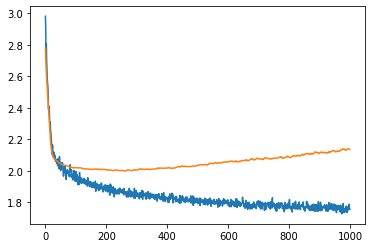

In [63]:
import matplotlib.pyplot as plt

m = history.history
plt.plot(m["loss"])
plt.plot(m["val_loss"])
plt.show()

In [47]:
from keras.models import load_model
model.save('train_hit_model.h5')

In [68]:
model = load_model('./best_train_hit_model.h5')

ValueError: No model found in config file.

In [ ]:
xhat_idx = np.random.choice(X_test.shape[0], 5)
xhat = X_test[xhat_idx]
yhat = model.predict_classes(xhat)

for i in range(5):
    print('True : ' + str(argmax(y_test[xhat_idx[i]])) + ', Predict : ' + str(yhat[i]))